# Classification Models

In [ ]:
import pandas as pd
import numpy as np
from datetime import date

from pandas_datareader.data import DataReader
from scipy.stats import chi2

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, accuracy_score, f1_score, classification_report, recall_score, confusion_matrix, ConfusionMatrixDisplay

#from google.colab import drive
#drive.mount('/content/drive')

# Obtención de datos

### Tarea de la semana del 22 al 28 de enero 2024 (únicamente sección obtención de datos)

* 1. Importar el dataset de iris y almacenarlo en variables "y" y "X"
** 1.1 Tip: ya se importó la librería del dataset de iris solo es cuestión de crear las variables X e y (completo)
* 2. Almacenar los datos del dataset de iris en un dataframe de pandas (completo)
* 3. Poner una breve descripción de los datos y señalar en que consiste estos datos (PENDIENTE)
** 3.1 Consejo: es necesario también señalar el tipo de dato de cada variable

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.   **Enteros (int):** Representan numeros enteros, positivos o negativos
Ejemplo: 5,6,-2
2.   **Flotantes (float):** Son numeros con punto decimal
Ejemplo: 3.13, 5.34, -25.38


3.   **Cadenas de texto (str):** Representados por comillas simples o dobles, es texto
Ejemplo: "Hola Axel", 'Hola Armando'
4.   **Booleanos (bool):** Representan valores de verdad o falso 'True' o 'False'

5.   **Listas (list):** Alamcenan secuencias ordenadas de elementos. Son modificables
Ejemplo: Lista= [1,2,3,4], Lista2= ["Toño","Pablo"]
6.   **Tuplas (Tuple):**Similar a la lista pero no se pueden cambiar y usan parentesisi
Ejemplo: Tupla= ("Alfredo", "Beto")
7.   **Conjuntos (set):** coleccion desordenada de elementos únicos, se define usando llaves "{}" o con la funcion "set"
Ejemplo: Conjunto={34,35,35,37}
8.   **Diccionario (dict):** Almacenan pares clave-valor, donde cada clave esta asociada a un valor
Ejemplo: diccionario= {"Juan":25, "Pedro":40}








El dataset de iris es de tipo flotante "float" para las medidas y de tipo enteros "int" para los enteros.

# Analisis Exploratorio de Datos

## Tarea semana 29 de enero al 06 de febrero 2024

* Terminar punto 3 de la tarea anterior. Mostrar los tipos de datos del dataset, investigar e indicar en una celda de texto los tipos de datos que existen en Python.

* Mostrar la estadística descriptiva del conjunto de datos de Iris (realizado)

* Investigar y escribir en una celda de texto la definición de cada una de las métricas presentadas en la estadística descriptiva

* Investigar y escribir en una celda de texto los conceptos de One Hot Encoding y Label Encoding. ¿En qué se diferencian?

In [ ]:
print("Estadística descriptiva de Iris:")
print(iris_df.describe())

Estadística descriptiva de Iris:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


1.   **count:** Muestra el numero de datos no nulos de cada columna
2.   **Mean:** Muestra la media o promedio de todas la observaciones de cada columna
4.   **std:** Muestra la desviación estandar (dispersion de los valores con respecto a la media) de cada columna
5.   **min:** Muestra el valor minimo observado dentro de la columna
6.   **25%:** Muestra el 1er cuartil
7.   **50%:** Muestra el 2do cuartul
8.   **75%:** Muestra el 3er cuartil
9.   **max:** Muestra el valor maximo dendro de la columna

**One Hot Encoding y Label Encoding.**

Son técnicas utilizadas en el procesamiento de datos, especialmente cuando se trabaja con variables categóricas en el contexto del aprendizaje automático. Ambas técnicas son utilizadas para convertir variables categóricas en una forma que los algoritmos de aprendizaje automático puedan entender.

**Label Encoding:** Técnica en la que cada categoría única en una variable categórica se asigna a un número entero. Cada categoría recibe un código único, y esto se realiza de manera secuencial, asignando enteros de manera ordenada. Elemplo: OHE=['Toño','Felipe','Carlos'] [2, 1, 0]

**One Hot Encoding:** Técnica en la que se crea una nueva columna binaria (0 o 1) para cada categoría única en la variable categórica original. Cada columna representa la presencia o ausencia de una categoría específica.

**Diferencias**

Representación de Datos: Label Encoding (Representa las categorías con enteros, creando una relación de orden entre ellas); One-Hot Encoding (Crea columnas binarias para cada categoría, indicando su presencia o ausencia).

Número de Columnas: Label Encoding (Crea una sola columna con enteros); One-Hot Encoding (Crea una columna binaria para cada categoría, lo que puede resultar en más columnas).

Uso en Algoritmos: Label Encoding (Puede ser adecuado para algoritmos que pueden interpretar el orden implícito entre las categorías);One-Hot Encoding (Se utiliza comúnmente cuando no se desea introducir un orden implícito y para algoritmos que pueden verse afectados por la interpretación errónea de un orden).

Ejemplo de Aplicación: Label Encoding (Puede ser útil cuando hay un orden significativo en las categorías como "bajo", "medio", "alto"); One-Hot Encoding (A menudo se utiliza cuando no hay un orden intrínseco entre las categorías).

## Tarea semana 19 de enero al 25 de febrero 2024

* Mediante alguna técnica de asignación de variables dicotómicas o categóricas transformar el campo species en variables numéricas categóricas

* Crear un campo adicional llamado "y" en el dataframe que transforme en número los valores del campo "species"

* Mediante el uso de alguna librería de gráficos (matplotlib, seaborn o plotly) realizar un análisis exploratorio de datos creando al menos tres tipos de gráficos: 1) gráficas de lineas; 2) gráficas de dispersión; 3) histograma para analizar los campos del dataframe de estudio

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Aplicar One-Hot Encoding a la columna 'species'
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Crear un nuevo DataFrame con las variables codificadas
encoded_df = pd.DataFrame(y_encoded, columns=encoder.get_feature_names(['species']))

# Concatenar el DataFrame codificado con las características originales
data_encoded = pd.concat([data.drop('species', axis=1), encoded_df], axis=1)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('species', axis=1), data_encoded[['species_setosa', 'species_versicolor', 'species_virginica']], test_size=0.2, random_state=42)

# Imprimir el conjunto de datos resultante
print(data_encoded.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

MATPLOTLIB

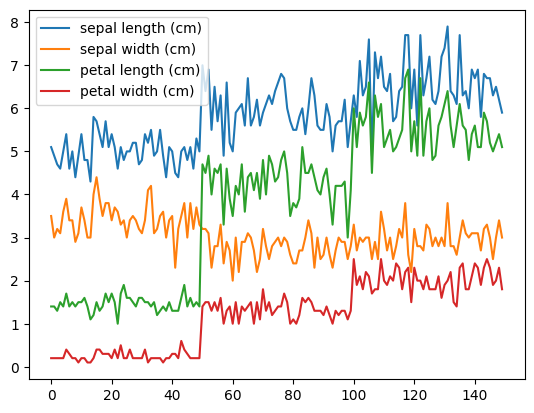

In [ ]:
#Grafica de LINEAS BASICO
iris_df.plot()
plt.show()

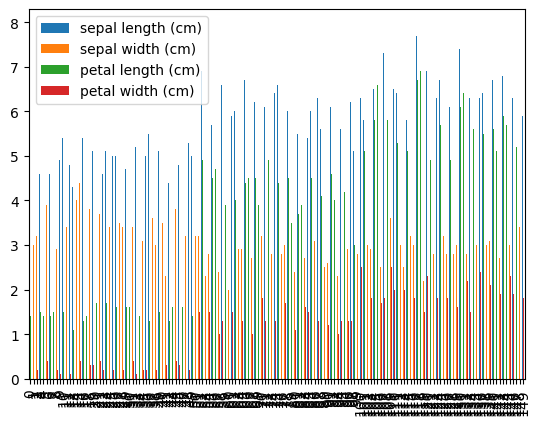

In [ ]:
# Grafico de Barras
iris_df.plot(kind='bar')
plt.show()

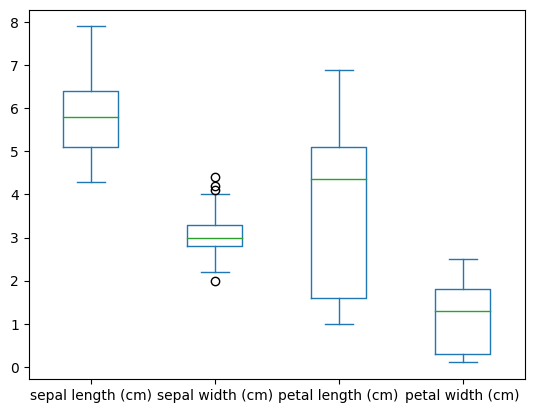

In [ ]:
#Grafico de caja:
iris_df.plot(kind='box')
plt.show()

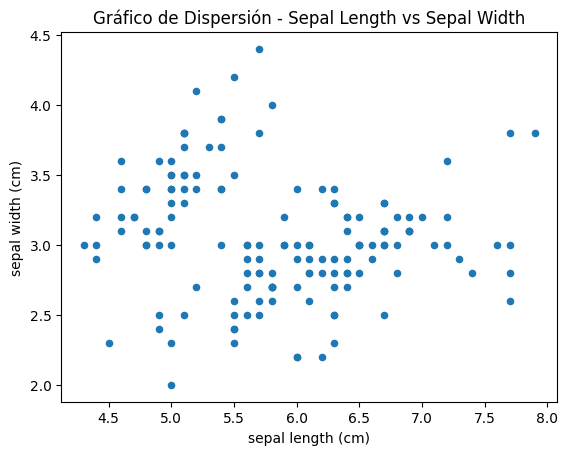

In [ ]:
#Grafico de dispersion
iris_df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')
plt.title('Gráfico de Dispersión - Sepal Length vs Sepal Width')
plt.show()

SEABORN

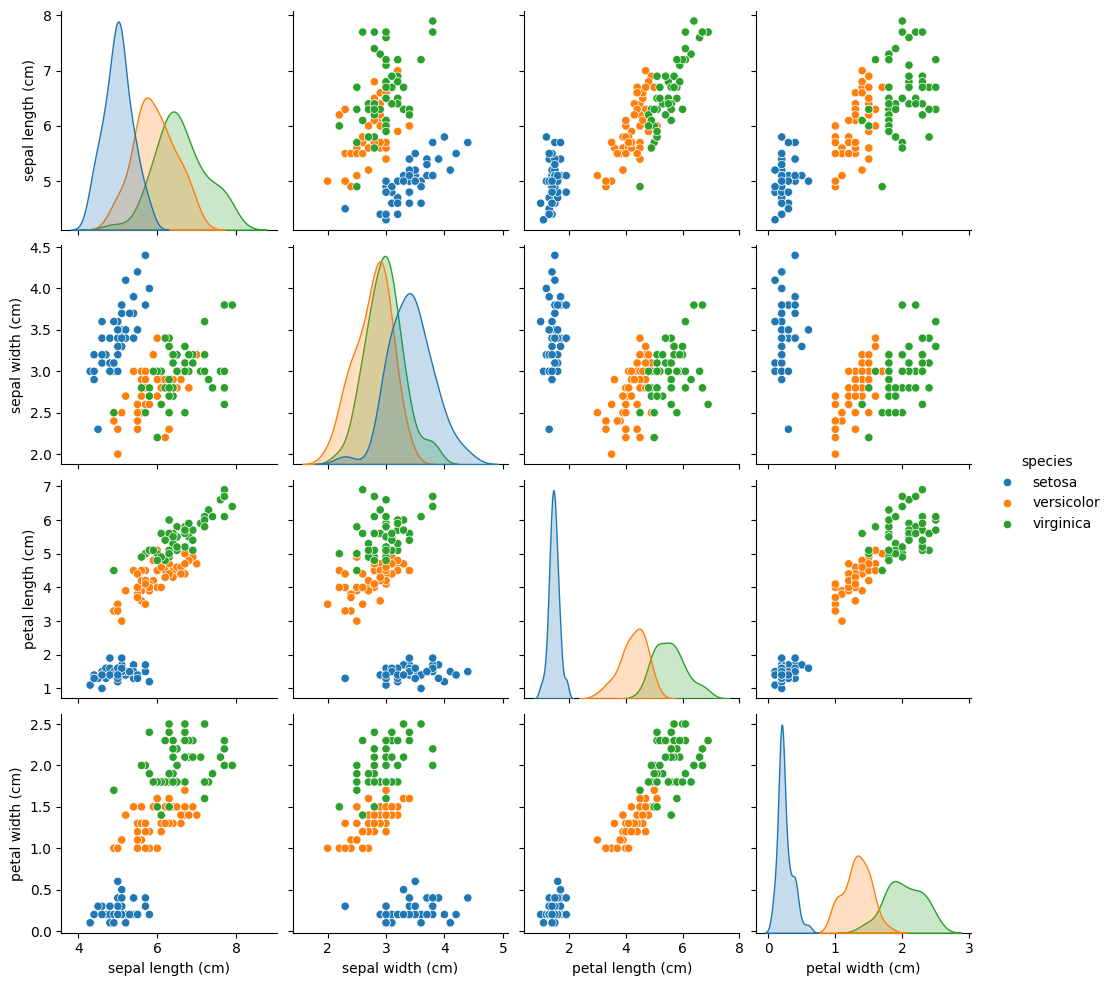

In [ ]:

sns.pairplot(iris_df, hue="species")
plt.show()

#El parámetro 'hue' permite colorear los puntos de la gráfica según una variable categórica específica.

PLOTLY

In [ ]:
import plotly.graph_objects as go

# gráfico de dispersión tridimensional con plotly
fig = go.Figure(data=go.Scatter3d(
    x=iris_df['sepal length (cm)'],
    y=iris_df['sepal width (cm)'],
    z=iris_df['petal length (cm)'],
    mode='markers',
    marker=dict(
        size=8,
        color=iris_df['species'].astype('category').cat.codes,  # Colorear por especie
        colorscale='Plasma',  # Puedes cambiar el mapa de colores según tus preferencias (Plasma,Viridis,Jet,Hot)
        opacity=0.8
    )
))

# Nombre a los ejes
fig.update_layout(scene=dict(
                    xaxis_title='Sepal Length',
                    yaxis_title='Sepal Width',
                    zaxis_title='Petal Length'),
                  title='Gráfico 3D de Scatter - Iris Dataset')

# Mostrar el gráfico
fig.show()

# Analisis de Componentes principales

## Tarea semana del 15 al 19 de abril 2024
* Investigar que son los componentes principales. En que consiste.
* Describir de manera breve y práctica el método que se utiliza para obtener los componentes principales
* Indicar que es un eigenvector y que es un eigenvalor



**COMPONENTES PRINCIPALES**

Los componentes principales son las direcciones en las cuales los datos varían más en un conjunto de datos. Son vectores que representan la dirección de mayor varianza en los datos y son ortogonales entre sí. Los componentes principales se utilizan para reducir la dimensionalidad de los datos mientras se conserva la mayor cantidad posible de información.

El primer componente principal representa la dirección de máxima varianza en los datos. El segundo componente principal representa la dirección de máxima varianza restante. Cada componente principal es una combinación lineal de todas las características originales, y están ordenados por la cantidad de varianza que explican.

**METODO QUE SE UTILIZA**
1) Preprocesamiento de datos: Antes de calcular los componentes principales, es común preprocesar los datos para asegurar que estén en un formato adecuado. Esto puede incluir la estandarización de las características para asegurar que todas tengan una escala similar.

2) Cálculo de la matriz de covarianza o matriz de correlación: Los componentes principales se calculan a partir de la matriz de covarianza o la matriz de correlación de los datos, dependiendo de si las unidades de las características son comparables o no. La matriz de covarianza mide la variabilidad conjunta entre dos variables, mientras que la matriz de correlación mide la relación lineal entre dos variables, normalizando la covarianza.

3) Descomposición de la matriz: Después de obtener la matriz de covarianza o correlación, se procede a descomponerla en sus componentes principales. Esto se puede hacer utilizando métodos como la descomposición de valores propios (eigenvalues) o la descomposición de valores singulares (SVD).

4) Selección de componentes principales: Dependiendo del objetivo del análisis, se selecciona un número específico de componentes principales que capturen una cantidad adecuada de variabilidad en los datos. A menudo, se eligen los primeros componentes principales que explican la mayor parte de la varianza total.

5) Proyección de datos: Una vez que se han identificado los componentes principales, se pueden proyectar los datos originales en el espacio definido por estos componentes. Esto proporciona una representación de menor dimensión de los datos originales.

En Python, se pueden utilizar bibliotecas como NumPy, SciPy o scikit-learn para realizar estos pasos.

# Tarea 22 al 26 de abril del 2024

* Indique en que consiste el método de StandardScaler, señale la fórmula que se utiliza
* Indique en qué consiste el método MinMaxScaler, señale la fórmula que se utiliza
* Indique en qué consiste el método RobustScaler, señale la fórmula que se utiliza
* Indique cual es la diferencia entre los tres métodos
* Crea tres variables que guarden los valores de la matriz X de la base de datos de Iris con cada uno de los métodos de escala de los datos

**StandardScaler:** es una técnica de preprocesamiento comúnmente utilizada en el aprendizaje automático para estandarizar las características de un conjunto de datos. Consiste en transformar los datos para que tengan una media igual a cero y una desviación estándar igual a uno. Esto es útil cuando las características del conjunto de datos tienen diferentes escalas y varianzas, lo que puede afectar el rendimiento de ciertos algoritmos de aprendizaje automático, como aquellos basados en distancias euclidianas.

La biblioteca scikit-learn automatiza este proceso cuando se utiliza el método fit_transform() de StandardScaler, que calcula la media y la desviación estándar de las características del conjunto de datos y luego estandariza los datos en función de esos valores.

In [ ]:
#z = (x - mean(x)) / std(x)

#Donde:

# x es el valor original de la característica.
# mean(x) es la media de la característica.
# std(x) es la desviación estándar de la característica.
# z es el valor estandarizado resultante.

**MinMaxScaler:** Técnica de preprocesamiento comúnmente utilizada en el aprendizaje automático para transformar las características de un conjunto de datos de manera que queden en un rango específico, generalmente entre 0 y 1. Esto es útil cuando se desea que todas las características tengan la misma escala, independientemente de sus valores originales.

La biblioteca scikit-learn automatiza este proceso cuando se utiliza el método fit_transform() de MinMaxScaler, que calcula los valores mínimos y máximos de las características del conjunto de datos y luego escala los datos en función de esos valores.

In [ ]:
# X_esc = (X - X_min) / (X_max - X_min) * (max - min) + min

# Donde:

# X es el valor original de la característica.
# X_min es el valor mínimo de la característica en el conjunto de datos.
# X_max es el valor máximo de la característica en el conjunto de datos.
# X_esc es el valor escalado resultante.
# min y max son los límites del rango al que se desea escalar los datos.

**RobustScaler:** es una técnica de preprocesamiento utilizada en el aprendizaje automático para escalar las características de un conjunto de datos utilizando estadísticas robustas, lo que significa que es menos sensible a los valores atípicos en los datos. A diferencia de StandardScaler y MinMaxScaler, que se basan en la media y la desviación estándar o en los valores mínimo y máximo, respectivamente, RobustScaler utiliza la mediana y los percentiles para escalar los datos.

La biblioteca NumPy se utiliza para calcular la mediana y los percentiles de los datos. La biblioteca scikit-learn automatiza este proceso cuando se utiliza el método fit_transform() de RobustScaler.

In [ ]:
# X_esc = (X - np.median(X)) / (np.percentile(X, 75) - np.percentile(X, 25))

# Donde:

# X es el valor original de la característica.
# np.median(X) devuelve la mediana de la característica.
# np.percentile(X, 75) devuelve el tercer cuartil (75º percentil) de la característica.
# np.percentile(X, 25) devuelve el primer cuartil (25º percentil) de la característica.
# X_esc es el valor escalado resultante.

# **DIFERENCIAS ENTRE StandardScaler, MinMaxScaler y RobustScaler**

Los tres métodos, StandardScaler, MinMaxScaler y RobustScaler, son utilizados para realizar el escalado de características en un conjunto de datos, pero difieren en cómo realizan esta transformación y en qué aspectos de los datos son sensibles.

1. **StandardScaler:**
* Proceso: Estandariza las características para que tengan una media de cero y una desviación estándar de uno.
* Sensibilidad a los valores atípicos: Sensible a los valores atípicos. Los valores extremos pueden afectar significativamente la media y la desviación estándar, lo que podría distorsionar la escala de los datos.
2. **MinMaxScaler:**
* Proceso: Escala las características de forma lineal para que queden en un rango específico, comúnmente entre 0 y 1.
* Sensibilidad a los valores atípicos: Sensible a los valores atípicos. Los valores extremos pueden afectar la escala de los datos, especialmente si están lejos del rango de la mayoría de los datos.
3. RobustScaler:
* Proceso: Utiliza estadísticas robustas como la mediana y los percentiles para escalar las características, lo que lo hace menos sensible a los valores atípicos.
* Sensibilidad a los valores atípicos: Menos sensible a los valores atípicos en comparación con StandardScaler y MinMaxScaler. Utiliza la mediana y los percentiles en lugar de la media y la desviación estándar, lo que lo hace más robusto ante valores extremos.

En resumen, StandardScaler y MinMaxScaler son sensibles a los valores atípicos y pueden verse afectados por ellos, mientras que RobustScaler es más resistente a los valores atípicos debido a su uso de estadísticas robustas como la mediana y los percentiles. La elección del método depende del conjunto de datos y de si se desea mantener o mitigar el efecto de los valores atípicos en el proceso de escalado.


## Falta el código para realizar el analisis de componentes principales

* * Con la base de datos de Iris, realizar el análisis de componentes principales con datos normales, datos estadarizados, datos con mixmanscaler y con datos robustos

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un DataFrame para facilitar la visualización
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Aplicar PCA con diferentes técnicas de preprocesamiento
preprocessors = {
    "Sin preprocesamiento": None,
    "Datos normalizados": StandardScaler().fit_transform(X),
    "Datos estandarizados": MinMaxScaler().fit_transform(X),
    "Datos con MinMaxScaler": MinMaxScaler().fit_transform(X),
    "Datos con RobustScaler": RobustScaler().fit_transform(X)
}

# Aplicar PCA y mostrar los resultados para cada técnica de preprocesamiento
for method, data in preprocessors.items():
    print(f"\nAnálisis de Componentes Principales con {method}:")
    if data is None:
        pca = PCA()
        pca.fit(X)
    else:
        pca = PCA()
        pca.fit(data)

    # Obtener las componentes principales
    components = pca.components_
    explained_variance = pca.explained_variance_ratio_

    print("Varianza explicada por cada componente:")
    for i, ev in enumerate(explained_variance):
        print(f"Componente {i+1}: {ev:.2f}")

    # Proyectar los datos en el espacio de las componentes principales
    projected_data = pca.transform(X)




Análisis de Componentes Principales con Sin preprocesamiento:
Varianza explicada por cada componente:
Componente 1: 0.92
Componente 2: 0.05
Componente 3: 0.02
Componente 4: 0.01

Análisis de Componentes Principales con Datos normalizados:
Varianza explicada por cada componente:
Componente 1: 0.73
Componente 2: 0.23
Componente 3: 0.04
Componente 4: 0.01

Análisis de Componentes Principales con Datos estandarizados:
Varianza explicada por cada componente:
Componente 1: 0.84
Componente 2: 0.12
Componente 3: 0.03
Componente 4: 0.01

Análisis de Componentes Principales con Datos con MinMaxScaler:
Varianza explicada por cada componente:
Componente 1: 0.84
Componente 2: 0.12
Componente 3: 0.03
Componente 4: 0.01

Análisis de Componentes Principales con Datos con RobustScaler:
Varianza explicada por cada componente:
Componente 1: 0.62
Componente 2: 0.35
Componente 3: 0.03
Componente 4: 0.00


# KPIs y métricas de evaluación de modelos de clasificación

# Tarea 22 al 26 de abril del 2024

* ¿Qué es una matriz de confusión?
* Mencione las métricas de la matriz de confusión e indique la fórmula
* ¿Qué es la tasa de error de clasificación?
* ¿Qué es la precision, recall, f1-score y support?
* Indique que es la curva AUC -ROC e indique como se lee la curva






# **¿Qué es una matriz de confusión?**
Una matriz de confusión es una herramienta fundamental en el análisis de la clasificación de datos. Se utiliza comúnmente en el campo de la inteligencia artificial, el aprendizaje automático y la estadística para evaluar el rendimiento de un modelo de clasificación.

La matriz de confusión muestra la cantidad de veces que un modelo clasifica correctamente y incorrectamente cada una de las clases de un conjunto de datos. Consiste en una tabla que organiza los resultados de la clasificación en cuatro categorías:

1. Verdaderos positivos (TP): casos en los que el modelo predice correctamente una clase como positiva.
2. Verdaderos negativos (TN): casos en los que el modelo predice correctamente una clase como negativa.
3. Falsos positivos (FP): casos en los que el modelo predice incorrectamente una clase como positiva cuando en realidad es negativa (error tipo I).
4. Falsos negativos (FN): casos en los que el modelo predice incorrectamente una clase como negativa cuando en realidad es positiva (error tipo II).

# Métricas de la matriz de confusión


In [ ]:
# Calcular la PRECISION (Accuracy)
precision = (TP + TN) / (TP + TN + FP + FN)
print("Precisión (Accuracy):", precision)

In [ ]:
# Calcular la SENSIBILIDAD (Recall)
sensibilidad = TP / (TP + FN)
print("Sensibilidad (Recall):", sensibilidad)

In [ ]:
# Calcular la ESPECIFICIDAD (Specificity)
especificidad = TN / (TN + FP)
print("Especificidad (Specificity):", especificidad)

In [ ]:
# Calcular el VALOR PREDICTIVO NEGATIVO
npv = TN / (TN + FN)
print("Valor predictivo negativo:", npv)

In [ ]:
# Calcular el F1-SCORE
f1_score = 2 * (precision * sensibilidad) / (precision + sensibilidad)
print("F1-score:", f1_score)

# ¿Qué es la tasa de error de clasificación?
La tasa de error de clasificación es una métrica que indica la proporción de observaciones clasificadas incorrectamente por un modelo de clasificación con respecto al total de observaciones. En otras palabras, representa la fracción de predicciones erróneas realizadas por el modelo.Una tasa de error de clasificación más baja indica un mejor rendimiento del modelo, ya que implica que el modelo ha cometido menos errores al predecir las clases de los datos.

In [ ]:
# Calcular la tasa de error de clasificación
error_rate = (FP + FN) / (TP + TN + FP + FN)
print("Tasa de error de clasificación:", error_rate)

# Donde: TP, TN, FP y FN son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos,
#respectivamente. Estos valores deben ser proporcionados según el contexto del problema de clasificación específico.


# ¿Qué es la precision, recall, f1-score y support?
Las métricas de precisión (precision), sensibilidad (recall), puntuación F1 (F1-score) y soporte (support) son medidas comunes utilizadas para evaluar el rendimiento de un modelo de clasificación. Aquí está una explicación de cada una:

* Precisión (Precision):
La precisión es una medida de la exactitud de las predicciones positivas realizadas por el modelo. Se calcula como la proporción de verdaderos positivos (TP) respecto a todos los casos clasificados como positivos (TP + FP). En otras palabras, la precisión mide la fracción de predicciones positivas que son correctas.

* Sensibilidad (Recall o True Positive Rate):
La sensibilidad es una medida de la capacidad del modelo para identificar correctamente todas las muestras positivas. Se calcula como la proporción de verdaderos positivos (TP) respecto a todos los casos que realmente son positivos (TP + FN). La sensibilidad también se conoce como tasa de verdaderos positivos.

* Puntuación F1 (F1-score):
La puntuación F1 es una medida que combina precisión y sensibilidad en un solo valor. Se calcula como la media armónica de precisión y sensibilidad. La puntuación F1 alcanza su mejor valor en 1 (indicando una perfecta precisión y sensibilidad) y su peor valor en 0.

* Soporte (Support):
El soporte es simplemente el número de ocurrencias de cada clase en el conjunto de datos de prueba. Proporciona información sobre la distribución de las clases en el conjunto de datos. El soporte puede ser útil para identificar clases desbalanceadas en el conjunto de datos.


Estas métricas son útiles para evaluar el rendimiento de un modelo de clasificación desde diferentes perspectivas: precisión para la exactitud de las predicciones positivas, sensibilidad para la capacidad de detectar todas las muestras positivas, y la puntuación F1 como una medida combinada de precisión y sensibilidad. El soporte complementa estas métricas proporcionando información sobre la distribución de las clases.

# Indique que es la curva AUC -ROC e indique como se lee la curva
* La curva AUC-ROC (Area Under the Receiver Operating Characteristic curve) es una métrica comúnmente utilizada para evaluar y comparar el rendimiento de modelos de clasificación binaria. La curva AUC-ROC representa la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1 - especificidad) para diferentes umbrales de clasificación.

* La curva AUC-ROC se representa gráficamente con el eje x que muestra la tasa de falsos positivos (1 - especificidad) y el eje y que muestra la tasa de verdaderos positivos (sensibilidad). La curva muestra cómo cambia la sensibilidad con respecto a la especificidad a medida que se varía el umbral de clasificación.

* Cuando la curva AUC-ROC se encuentra más cerca del vértice superior izquierdo del gráfico, significa que el modelo tiene una mayor capacidad de distinguir entre las clases positivas y negativas, lo que indica un mejor rendimiento del modelo. La diagonal de la curva (de (0,0) a (1,1)) representa el rendimiento de un clasificador aleatorio.

* La métrica AUC (Area Under the Curve) proporciona una medida numérica del rendimiento del modelo. Cuanto mayor sea el valor de AUC, mejor será el rendimiento del modelo. Un valor de AUC igual a 1 indica un modelo perfecto que clasifica todas las muestras correctamente, mientras que un valor de AUC igual a 0.5 indica un rendimiento equivalente al azar.

En resumen, la curva AUC-ROC y su métrica AUC son herramientas útiles para evaluar la capacidad de discriminación de un modelo de clasificación binaria y comparar diferentes modelos. Una curva AUC-ROC más cercana al vértice superior izquierdo y un valor de AUC más alto indican un mejor rendimiento del modelo.

# Logit

## Tarea del 29 de abril al 03 de mayo 2024

* Que es un modelo logit y para que tipo de datos se utiliza
* ¿Por qué se elige este modelo en contraste con el modelo lineal probabilístico?

* Mencione el método de estimación que utiliza el modelo Logit
* Realice el modelo logit con las siguientes variables de entrada X:
    * X original (sin escalamiento)
    * X estandarizada
    * X con MinMaxScaler
    * X con RobustScaler
    * X de PCA estandarizada
    * X de PCA con minmax scaler
    * X de PCA con robust scaler



**¿Que es un modelo logit y para que tipo de datos se utiliza?**

Un modelo logit es un tipo de modelo de regresión utilizado principalmente para modelar la probabilidad de que un evento binario ocurra en función de uno o más variables predictoras. Es una técnica comúnmente utilizada en estadística y aprendizaje automático para problemas de clasificación binaria, donde el resultado deseado puede ser "sí" o "no", "0" o "1", "positivo" o "negativo".El término "logit" proviene de la función de enlace logit, que transforma las probabilidades en una escala logarítmica para permitir la modelización lineal. El modelo logit se basa en la distribución logística, que tiene una forma en "S" y se ajusta bien a la modelización de probabilidades.

 Se pueden aplicar a datos de diferentes tipos, siempre y cuando el resultado que se esté modelando sea binario, es decir, tenga solo dos categorías posibles. Ejemplos de aplicaciones incluyen predecir si un cliente comprará o no un producto, si un paciente tendrá una cierta condición médica, si un estudiante aprobará un examen, etc.








**¿Por qué se elige este modelo en contraste con el modelo lineal probabilístico?**

El modelo logit se elige sobre el modelo lineal probabilístico en casos donde se trabaja con variables categóricas o binarias, es decir, cuando el resultado que se está tratando de predecir es una variable binaria.

Razones clave:

1. **Interpretación de probabilidades:** El modelo logit proporciona estimaciones directas de las probabilidades de ocurrencia de un evento binario. Esto significa que podemos interpretar fácilmente cómo cada variable predictora influye en la probabilidad de que ocurra el evento de interés. Por otro lado, en un modelo lineal probabilístico, aunque se pueden obtener estimaciones de probabilidad, la interpretación puede ser menos directa.
2. **Manejo de límites:** El modelo logit asegura que las probabilidades pronosticadas estén limitadas entre 0 y 1, lo cual es natural para variables de probabilidad. En un modelo lineal, las predicciones no están restringidas y pueden caer fuera de este rango.
3. **No linealidad en la relación entre variables:** En muchos casos, la relación entre las variables predictoras y la variable de resultado no es lineal. El modelo logit permite capturar estas relaciones no lineales de manera más efectiva a través de la función de enlace logit.
4. **Robustez frente a valores atípicos:** El modelo logit tiende a ser más robusto frente a valores atípicos o errores de datos en comparación con los modelos lineales tradicionales.
5. **Adecuación para variables categóricas:** El modelo logit puede manejar fácilmente variables categóricas y codificaciones de variables dummy, lo que lo hace especialmente útil para problemas con múltiples variables predictoras categóricas.

**Método de estimación que utiliza el modelo Logit**

El método de estimación comúnmente utilizado para ajustar un modelo logit a los datos es el método de Máxima Verosimilitud (Maximum Likelihood Estimation, MLE). En este método, se busca encontrar los parámetros del modelo que maximizan la verosimilitud de observar los datos observados bajo el modelo especificado.El método de MLE es ampliamente utilizado debido a sus buenas propiedades estadísticas y su capacidad para proporcionar estimaciones eficientes y consistentes de los parámetros del modelo logit.

El procedimiento implica lo siguiente:

1. **Especificación del modelo:** Se define el modelo logit, incluyendo las variables predictoras y la función de enlace logit.
2. **Definición de la función de verosimilitud:** Se establece la función de verosimilitud, que es la probabilidad de observar los datos dados los parámetros del modelo.
3. **Maximización de la función de verosimilitud:** Se utilizan técnicas de optimización numérica para encontrar los valores de los parámetros que maximizan la función de verosimilitud. Esto puede hacerse a través de algoritmos como el algoritmo de Newton-Raphson, el algoritmo de gradiente descendente, o algoritmos más avanzados como el algoritmo de maximización de esperanzas (EM) en casos más complejos.
4. **Evaluación de la bondad del ajuste:** Una vez estimados los parámetros, se evalúa la bondad del ajuste del modelo utilizando diferentes métricas como la devianza, el coeficiente de determinación pseudo-R cuadrado de McFadden, entre otros.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Cargar la base de datos de iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear los objetos para cada transformación
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
pca = PCA(n_components=2)
pca_scaler = StandardScaler()
pca_minmax_scaler = MinMaxScaler()
pca_robust_scaler = RobustScaler()

# Crear modelos logit para cada conjunto de datos transformado
models = [
    ("Original", LogisticRegression()),
    ("Estandarizada", make_pipeline(scaler, LogisticRegression())),
    ("MinMaxScaler", make_pipeline(minmax_scaler, LogisticRegression())),
    ("RobustScaler", make_pipeline(robust_scaler, LogisticRegression())),
    ("PCA Estandarizada", make_pipeline(pca, pca_scaler, LogisticRegression())),
    ("PCA MinMaxScaler", make_pipeline(pca, pca_minmax_scaler, LogisticRegression())),
    ("PCA RobustScaler", make_pipeline(pca, pca_robust_scaler, LogisticRegression()))
]

# Entrenar y evaluar los modelos
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name}, Precisión: {accuracy:.2f}")

Modelo: Original, Precisión: 1.00
Modelo: Estandarizada, Precisión: 1.00
Modelo: MinMaxScaler, Precisión: 0.91
Modelo: RobustScaler, Precisión: 1.00
Modelo: PCA Estandarizada, Precisión: 1.00
Modelo: PCA MinMaxScaler, Precisión: 0.84
Modelo: PCA RobustScaler, Precisión: 0.89


## Validación de Logit

### Tarea del 29 de abril al 03 de mayo 2024
* Indique las pruebas de especificación que se aplican en este modelo
* Indique en qué consiste la pseudo R2 de McFadden y la razón de verosimilitud

**Pruebas de especificación que se aplican en este modelo**

**1. Test de bondad de ajuste (Goodness of Fit):** Este test evalúa si el modelo ajustado se ajusta bien a los datos observados. Puede hacerse utilizando el estadístico de devianza y comparándolo con un valor crítico de una distribución chi-cuadrado.

**2. Test de link function:** Dado que el modelo logit utiliza la función de enlace logit para relacionar las variables predictoras con la probabilidad de ocurrencia del evento, podemos verificar si esta función es adecuada para nuestros datos. Esto puede hacerse examinando la relación entre las variables predictoras y la probabilidad pronosticada utilizando gráficos o pruebas estadísticas.

**3. Test de linealidad en los log-odds:** El modelo logit asume una relación lineal entre las variables predictoras y el logaritmo de las probabilidades logísticas (log-odds). Podemos realizar pruebas de hipótesis para verificar esta suposición utilizando técnicas como el análisis de residuos o pruebas estadísticas específicas.

**4. Test de multicolinealidad:** Si estamos utilizando múltiples variables predictoras en el modelo, es importante verificar si existe multicolinealidad entre ellas, ya que puede afectar la interpretación de los coeficientes estimados. Esto puede evaluarse mediante el cálculo del factor de inflación de la varianza (VIF) para cada variable predictora.

**5. Test de independencia de errores:** Este test evalúa si los errores en la predicción del modelo son independientes entre sí. Esto es importante para garantizar la validez de las pruebas de significancia de los coeficientes estimados. Puede realizarse visualmente mediante el análisis de los residuos del modelo o utilizando pruebas estadísticas específicas.

**Pseudo R^2 de McFadden**

La pseudo R^2 de McFadden es una medida de bondad de ajuste para modelos logit. Fue propuesta por John McFadden y es una adaptación de la R^2 utilizada en modelos de regresión lineal. Sin embargo, a diferencia de la R^2 en modelos lineales, la pseudo R^2 de McFadden no tiene una interpretación directa como porcentaje de varianza explicada, sino que es una medida de cuánto mejor es el modelo en comparación con un modelo nulo (modelo sin variables predictoras).

In [ ]:
# Formula en codigo
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def mcfadden_pseudo_r2(model, X, y):
    # Log-verosimilitud del modelo ajustado
    ll_model = -log_loss(y, model.predict_proba(X))
    # Log-verosimilitud del modelo nulo (solo intercepto)
    intercept_model = LogisticRegression(penalty='none', solver='newton-cg').fit(np.ones((len(X), 1)), y)
    ll_null = -log_loss(y, intercept_model.predict_proba(np.ones((len(X), 1))))
    # Pseudo R^2 de McFadden
    pseudo_r2 = 1 - (ll_model / ll_null)
    return pseudo_r2

pseudo_r2 = mcfadden_pseudo_r2(model, X, y)
print("Pseudo R^2 de McFadden:", pseudo_r2)

 **Razón de verosimilitud**
La razón de verosimilitud es una prueba estadística utilizada para comparar dos modelos anidados, uno más simple (modelo restringido) y otro más complejo (modelo no restringido). En el contexto de un modelo logit, la razón de verosimilitud se utiliza para determinar si la inclusión de un conjunto de variables predictoras mejora significativamente el ajuste del modelo.

La distribución de la razón de verosimilitud sigue aproximadamente una distribución chi-cuadrado bajo la hipótesis nula de que el modelo restringido es correcto. Por lo tanto, se puede utilizar para realizar pruebas de hipótesis sobre la significancia de las variables predictoras añadidas al modelo.



In [ ]:
# Formula en codigo
def likelihood_ratio_test(model_restricted, model_unrestricted, X_restricted, X_unrestricted, y):
    # Log-verosimilitud del modelo restringido
    ll_restricted = -log_loss(y, model_restricted.predict_proba(X_restricted))
    # Log-verosimilitud del modelo no restringido
    ll_unrestricted = -log_loss(y, model_unrestricted.predict_proba(X_unrestricted))
    # Razón de verosimilitud
    lr_statistic = -2 * (ll_restricted - ll_unrestricted)
    # Grados de libertad
    df = len(X_unrestricted[0]) - len(X_restricted[0])
    # Valor p usando una distribución chi-cuadrado
    p_value = 1 - chi2.cdf(lr_statistic, df)
    return lr_statistic, p_value

# Suponiendo que `model_restricted` es el modelo más simple (menos características)
# y `model_unrestricted` es el modelo más complejo (más características)
lr_statistic, p_value = likelihood_ratio_test(model_restricted, model_unrestricted, X_restricted, X_unrestricted, y)
print("Estadístico de la razón de verosimilitud:", lr_statistic)
print("Valor p:", p_value)

En resumen, tanto la pseudo R^2 de McFadden como la razón de verosimilitud son medidas importantes para evaluar la calidad de ajuste y la significancia de los predictores en un modelo logit.

# Decision Tree

## Validacion del Decision Tree

# Random Forest

## Validacion del Random Forest